In [5]:
import pandas as pd
import subprocess
import os
import re
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

In [2]:
directory = "/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth"
chromosomes = list(map(str, range(1, 20))) + ['X', 'Y']
pileup_data = {}

for chr in chromosomes:
    file_path = os.path.join(directory, f"CLIP-chr{chr}_depth.pileup")
    try:
        df = pd.read_csv(file_path, sep='\t', names=['chrom', 'pos', 'ref', 'count', 'basereads', 'quals'])
        pileup_data[f"chr{chr}"] = df
    except FileNotFoundError:
        print(f"File not found: {file_path}")


In [3]:
tokeep = re.compile('[^AGCTagct]')
for chr_key in pileup_data.keys():
    pileup_data[chr_key]['matches'] = pileup_data[chr_key]['basereads'].apply(lambda x: tokeep.sub('', x))

In [4]:
pileup_new = {}

for chr_key in pileup_data.keys():
    pileup_new[chr_key] = pileup_data[chr_key][['chrom', 'pos', 'matches']]
    pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()

/tmp/ipykernel_119897/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()
/tmp/ipykernel_119897/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()
/tmp/ipykernel_119897/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [6]:
for chr_key in pileup_data.keys():
    pileup_new[chr_key] = pileup_new[chr_key][pileup_new[chr_key]['matches'].str.len() >= 100]

In [7]:
def calculate_shannon_entropy(base_counts):
    total = sum(base_counts.values())
    entropy = 0
    for count in base_counts.values():
        if count > 0:
            p = count / total
            entropy -= p * np.log2(p)
    return entropy



for chr_key in pileup_data.keys():
    entropies = []
    for index, row in pileup_new[chr_key].iterrows():
        base_counts = Counter(row['matches'])
        entropy = calculate_shannon_entropy(base_counts)
        entropies.append(entropy)
    pileup_new[chr_key]['shannon_entropy'] = entropies

In [8]:
shannon_entropy_values = []
for chr_key in pileup_data.keys():
    shannon_entropy_values += pileup_new[chr_key]['shannon_entropy'].tolist()

(array([6.41746e+05, 5.53780e+04, 3.31660e+04, 2.52390e+04, 1.99490e+04,
        1.58440e+04, 1.26580e+04, 1.01170e+04, 8.13200e+03, 6.73800e+03,
        5.51500e+03, 4.61900e+03, 3.85300e+03, 2.97200e+03, 2.37800e+03,
        1.95800e+03, 1.76500e+03, 1.57100e+03, 1.37800e+03, 1.35500e+03,
        1.13200e+03, 1.06500e+03, 9.89000e+02, 9.24000e+02, 8.63000e+02,
        8.65000e+02, 7.77000e+02, 7.57000e+02, 6.96000e+02, 6.53000e+02,
        5.47000e+02, 4.17000e+02, 2.45000e+02, 1.81000e+02, 1.13000e+02,
        7.30000e+01, 3.90000e+01, 2.20000e+01, 8.00000e+00, 2.00000e+00]),
 array([0.        , 0.04976964, 0.09953928, 0.14930891, 0.19907855,
        0.24884819, 0.29861783, 0.34838747, 0.39815711, 0.44792674,
        0.49769638, 0.54746602, 0.59723566, 0.6470053 , 0.69677494,
        0.74654457, 0.79631421, 0.84608385, 0.89585349, 0.94562313,
        0.99539277, 1.0451624 , 1.09493204, 1.14470168, 1.19447132,
        1.24424096, 1.2940106 , 1.34378023, 1.39354987, 1.44331951,
      

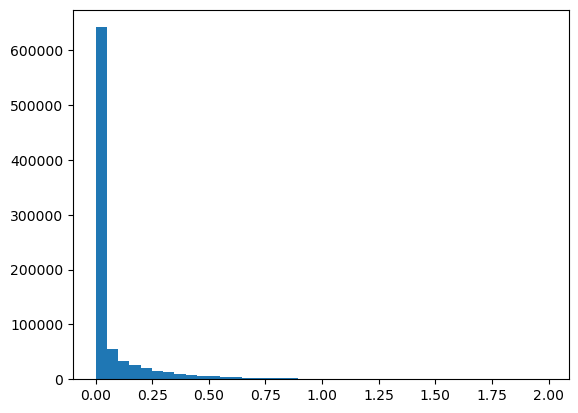

In [9]:
plt.hist(shannon_entropy_values, bins=40)
#plt.xlim(0.2,2)
#plt.ylim(0, 100000)

0.07967403917688695
0.0


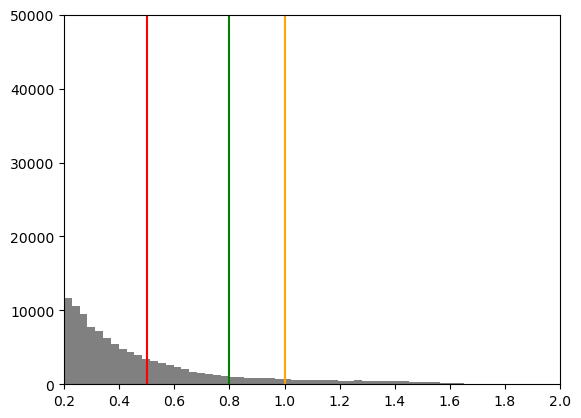

In [10]:
plt.hist(shannon_entropy_values, bins=70, color = 'grey')
plt.xlim(0.2,2)
plt.ylim(0, 50000)
plt.axvline(0.5, c='red')
plt.axvline(0.8, c='green')
plt.axvline(1, c='orange')
print(np.mean(shannon_entropy_values))
print(np.median(shannon_entropy_values))

In [11]:
count_greater_than_05 = sum(1 for x in shannon_entropy_values if x > 0.5)
count_greater_than_08 = sum(1 for x in shannon_entropy_values if x > 0.8)
count_greater_than_1 = sum(1 for x in shannon_entropy_values if x > 1)
count_all = len(shannon_entropy_values)
print(count_greater_than_05)
print(count_greater_than_08)
print(count_greater_than_1)
print(count_all)
print(count_greater_than_05 / count_all)
print(count_greater_than_08 / count_all)
print(count_greater_than_1 / count_all)

37495
16272
10208
866699
0.0432618475387649
0.018774684175244232
0.011778022127636007


In [12]:
pileup_shn_1 = {}

for chr_key in pileup_data.keys():
    pileup_shn_1[chr_key] = pileup_new[chr_key][pileup_new[chr_key]['shannon_entropy'] > 1]

In [13]:
pileup_shn = pd.concat([pileup_shn_1[f'chr{i}'] for i in range(1, 20)] + [pileup_shn_1['chrX'], pileup_shn_1['chrY']])
pileup_shn

,chrom,pos,matches,shannon_entropy
356,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164
554,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116
5755,chr1,4631665,GGGGGGGGGGGGGGGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749
6199,chr1,4636203,GGGGGGGGGGGGGGGGGGAACCCCCCCGGGGGGGGGGGGGAAGAGG...,1.001903
8095,chr1,4841534,AGAAGAAAAGGAAGAAAAAAAGAAAAGGATTTTTAAAAAAAAAAAA...,1.685160
...,...,...,...,...
315392,chrY,90802340,GGGGGGGGGAAAAGGGGAGAGAGAGGAAGGGGGGAGGGGGGGGGGG...,1.229220
316030,chrY,90802978,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,1.349606
316067,chrY,90803015,GGAGGGGAGGGAGAAGGGGGGGAAAAAAAAGAAAGGAAAGAGAGAA...,1.364902
333327,chrY,90820275,AGGGGGGAGAGGACGAAAGAGGGAGGAGAGCGCCAGGGAGGACGCA...,1.295107


In [15]:
pileup_shn['start'] = pileup_shn['pos'] - 6
pileup_shn['end'] = pileup_shn['pos'] + 5
pileup_shn

,chrom,pos,matches,shannon_entropy,start,end
356,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164,3222720,3222731
554,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116,3224570,3224581
5755,chr1,4631665,GGGGGGGGGGGGGGGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749,4631659,4631670
6199,chr1,4636203,GGGGGGGGGGGGGGGGGGAACCCCCCCGGGGGGGGGGGGGAAGAGG...,1.001903,4636197,4636208
8095,chr1,4841534,AGAAGAAAAGGAAGAAAAAAAGAAAAGGATTTTTAAAAAAAAAAAA...,1.685160,4841528,4841539
...,...,...,...,...,...,...
315392,chrY,90802340,GGGGGGGGGAAAAGGGGAGAGAGAGGAAGGGGGGAGGGGGGGGGGG...,1.229220,90802334,90802345
316030,chrY,90802978,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,1.349606,90802972,90802983
316067,chrY,90803015,GGAGGGGAGGGAGAAGGGGGGGAAAAAAAAGAAAGGAAAGAGAGAA...,1.364902,90803009,90803020
333327,chrY,90820275,AGGGGGGAGAGGACGAAAGAGGGAGGAGAGCGCCAGGGAGGACGCA...,1.295107,90820269,90820280


In [16]:
pileup_shn_depth = pileup_shn[pileup_shn['matches'].str.len() > 100]
pileup_shn_depth

,chrom,pos,matches,shannon_entropy,start,end
356,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164,3222720,3222731
554,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116,3224570,3224581
5755,chr1,4631665,GGGGGGGGGGGGGGGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749,4631659,4631670
6199,chr1,4636203,GGGGGGGGGGGGGGGGGGAACCCCCCCGGGGGGGGGGGGGAAGAGG...,1.001903,4636197,4636208
8095,chr1,4841534,AGAAGAAAAGGAAGAAAAAAAGAAAAGGATTTTTAAAAAAAAAAAA...,1.685160,4841528,4841539
...,...,...,...,...,...,...
315392,chrY,90802340,GGGGGGGGGAAAAGGGGAGAGAGAGGAAGGGGGGAGGGGGGGGGGG...,1.229220,90802334,90802345
316030,chrY,90802978,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,1.349606,90802972,90802983
316067,chrY,90803015,GGAGGGGAGGGAGAAGGGGGGGAAAAAAAAGAAAGGAAAGAGAGAA...,1.364902,90803009,90803020
333327,chrY,90820275,AGGGGGGAGAGGACGAAAGAGGGAGGAGAGCGCCAGGGAGGACGCA...,1.295107,90820269,90820280


In [17]:
bedform = pileup_shn_depth[['chrom', 'start', 'end']]
bedform.to_csv('CLIP_mut_harsh.bed', sep='\t', index=False, header=False)

In [18]:
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut_harsh.bed -fo CLIP_mut_harsh.fasta

In [19]:
refneg = pd.read_csv("/rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/gencode_negstrand.gtf.bed", sep="\t", header=None)
refneg.columns = ["chrom", "start", "end"]
refneg = refneg[refneg["chrom"] != "chrM"]
refneg

,chrom,start,end
0,chr1,3276124,3741721
1,chr1,3435954,3438772
2,chr1,3445779,3448011
3,chr1,3535200,3537508
4,chr1,3582674,3584730
...,...,...,...
27575,chrY,90510316,90542914
27576,chrY,90614770,90617133
27577,chrY,90676615,90678894
27578,chrY,90763696,90766736


In [20]:
pileup_shn_depth['negativity'] = False
for index, row in pileup_shn_depth.iterrows():
    chromosome = row['chrom']
    position = row['pos']

    for _, ref_row in refneg[refneg['chrom'] == chromosome].iterrows():
        if ref_row['start'] <= position <= ref_row['end']:
            pileup_shn_depth.at[index, 'negativity'] = True
            break


/tmp/ipykernel_119897/2741900521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['negativity'] = False


In [42]:
pileup_shn_depth['start'] = pileup_shn_depth['pos'] - 6
pileup_shn_depth['end'] = pileup_shn_depth['pos'] + 5
pileup_shn_depth

/tmp/ipykernel_119897/181903189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['start'] = pileup_shn_depth['pos'] - 6
/tmp/ipykernel_119897/181903189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['end'] = pileup_shn_depth['pos'] + 5


,chrom,pos,matches,shannon_entropy,start,end,negativity
356,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164,3222720,3222731,False
554,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116,3224570,3224581,False
5755,chr1,4631665,GGGGGGGGGGGGGGGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749,4631659,4631670,False
6199,chr1,4636203,GGGGGGGGGGGGGGGGGGAACCCCCCCGGGGGGGGGGGGGAAGAGG...,1.001903,4636197,4636208,False
8095,chr1,4841534,AGAAGAAAAGGAAGAAAAAAAGAAAAGGATTTTTAAAAAAAAAAAA...,1.685160,4841528,4841539,False
...,...,...,...,...,...,...,...
315392,chrY,90802340,GGGGGGGGGAAAAGGGGAGAGAGAGGAAGGGGGGAGGGGGGGGGGG...,1.229220,90802334,90802345,False
316030,chrY,90802978,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,1.349606,90802972,90802983,False
316067,chrY,90803015,GGAGGGGAGGGAGAAGGGGGGGAAAAAAAAGAAAGGAAAGAGAGAA...,1.364902,90803009,90803020,False
333327,chrY,90820275,AGGGGGGAGAGGACGAAAGAGGGAGGAGAGCGCCAGGGAGGACGCA...,1.295107,90820269,90820280,False


In [22]:
shn_pos = pileup_shn_depth[pileup_shn_depth['negativity'] == False]
shn_neg = pileup_shn_depth[pileup_shn_depth['negativity'] == True]

In [23]:
bedform_pos = shn_pos[['chrom', 'start', 'end']]
bedform_neg = shn_neg[['chrom', 'start', 'end']]
bedform_pos.to_csv('CLIP_mut_pos_harsh.bed', sep='\t', index=False, header=False)
bedform_neg.to_csv('CLIP_mut_neg_harsh.bed', sep='\t', index=False, header=False)

In [24]:
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut_pos_harsh.bed -fo CLIP_mut_pos_harsh.fasta
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut_neg_harsh.bed -fo CLIP_mut_neg_harsh.fasta

In [25]:
def reverse_complement(sequence):
    complement = str.maketrans('ATCG', 'TAGC')
    return sequence.translate(complement)[::-1]

def process_fasta(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        header = None
        sequence = []
        
        for line in infile:
            line = line.strip()
            if line.startswith('>'):
                if header is not None:
                    rev_comp_sequence = reverse_complement(''.join(sequence))
                    outfile.write(f"{header}\n{rev_comp_sequence}\n")
                
                header = line
                sequence = []
            else:
                sequence.append(line)
        
        if header is not None:
            rev_comp_sequence = reverse_complement(''.join(sequence))
            outfile.write(f"{header}\n{rev_comp_sequence}\n")


input_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_harsh.fasta'
output_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev_harsh.fasta'
process_fasta(input_file, output_file)

In [26]:
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_harsh.fasta | wc -l
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev_harsh.fasta | wc -l
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_pos_harsh.fasta | wc -l

10386
10386
9794


In [27]:
!cat /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_pos_harsh.fasta /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev_harsh.fasta > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_harsh.fasta

In [28]:
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_harsh.fasta | wc -l

20180


In [29]:
!awk 'NR % 2 == 0' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_harsh.fasta > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_harsh.fasta

In [34]:
def convert_sequences_t_to_u(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            modified_line = line.replace('T', 'U')
            outfile.write(modified_line)


input_sequences = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_harsh.fasta'
output_sequences = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_harsh_TU.fasta'
convert_sequences_t_to_u(input_sequences, output_sequences)

In [2]:
def find_top_hexamers_with_ratios(sequences):
    hexamer_counts = Counter()
    
    for seq in sequences:
        if len(seq) == 11:
            for i in range(len(seq) - 5):
                hexamer = seq[i:i+6]
                hexamer_counts[hexamer] += 1

    total_counts = sum(hexamer_counts.values())
    hexamer_ratios = {hexamer: count / total_counts for hexamer, count in hexamer_counts.items()}
    most_common_hexamers = Counter(hexamer_ratios).most_common(10)
    return most_common_hexamers

In [3]:
def fasta_to_list(fasta_file):
    with open(fasta_file, 'r') as file:
        sequences = [line.strip() for line in file if line.strip()]
    return sequences

# Usage example:
fasta_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_harsh_TU.fasta'
sequences_list = fasta_to_list(fasta_file)
sequences_list[0:5]

['UAGAGGCGUAG', 'AGCGCGGUGGC', 'ACCUAGAUUUA', 'CCUCAGAAAAU', 'AUGACGGUGCA']

In [6]:
top_hexamers = find_top_hexamers_with_ratios(sequences_list)
for hexamer, ratio in top_hexamers:
    print(f"Hexamer: {hexamer}, Ratio: {ratio:.4f}")


Hexamer: AAGGAG, Ratio: 0.0063
Hexamer: AGGAGA, Ratio: 0.0053
Hexamer: GAGGAG, Ratio: 0.0049
Hexamer: GAGAAG, Ratio: 0.0043
Hexamer: AGGAGG, Ratio: 0.0042
Hexamer: GAAGAG, Ratio: 0.0040
Hexamer: GGAGAU, Ratio: 0.0038
Hexamer: AAGAGG, Ratio: 0.0036
Hexamer: AAGAAG, Ratio: 0.0035
Hexamer: GGAGGA, Ratio: 0.0035


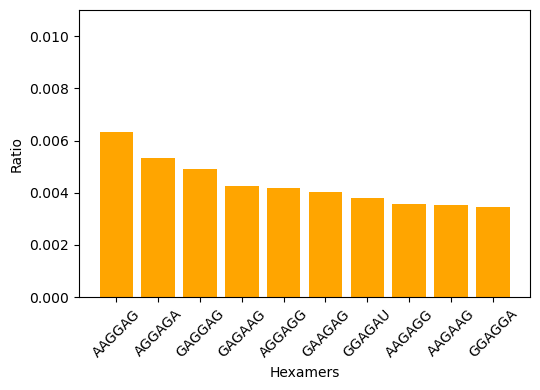

In [7]:
hexamers = [hexamer for hexamer, ratio in top_hexamers]
ratios = [ratio for hexamer, ratio in top_hexamers]

plt.figure(figsize=(5.5, 4))
plt.bar(hexamers, ratios, color='orange')
plt.xlabel('Hexamers')
plt.ylabel('Ratio')
plt.ylim(0, 0.011)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()